# API 221 Final Project

## Introduction + Motivation

One of the most direct ways citizens and police officers interact is through police stops. Police stops may seem like a minor interaction but they can both impact citizens through fines and attitudes about policing. 

In [ ]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.options.display.max_columns = 100

import csv
# import os 
# os.chdir('/Users/awickett/Documents/G2/Classes/AC221/')
# dir="/Users/awickett/Documents/G2/Classes/AC221/"

In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [ ]:
# %cd data

/Users/jessica/Documents/AC221/finalproject/data


In [ ]:
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process


## Data Collection

We have 2 main dataset, Voter Registration data and Police Stop data. 
- Voter Registration data -  there are 3 files for this data:
    - Polk County Voter Registration data (contains both Republic and Democrat voters)
    - Hillborough County Republic Voter Registration Data 
    - Hillborough County Democrat Voter Registration Data 
- Police Stop data (2017-2019) - there are 3 files for this data, one for each year

### Preprocessing Voters data



The code below was used to de-duplicate any lines (person) in the csv file, based on the unique full name of the person. We used column 1-4 to be the unique key (Last_Name, First_Name, Middle_Name, and Suffix) that was saved to a `set` and then removed any duplicated rows (person with the same Last_Name, First_Name, Middle_Name, and Suffix).


We then preprocess the names into the 5 naming convention as well:
- first and last name
- first, last, middle name
- first, last, middle initial
- first, last, middle name and suffix
- first, last, middle initial and suffix

We also extract the data about the political party affiliation, race, and gender for each row. We then assemble all this information in the form of a dictionary (which was later converted to dataframe for analysis e.g. merging/goruping/plotting).

This process is done for each of the 3 files we have (Polk Voters, Hillsborough Republic voters, and Hillsborough Democrat voters data).


### 1. Polk County Voters Data

In [ ]:
First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Parties = []
Race=[]
Gender=[]
# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []

list_party = ['NPA', 'DEM', 'REP', 'IND', 'LPF', 'GRE', 'REF', 'CPF', 'ECO', 'PSL']
with open("Voters.csv", "r") as cin:
    names_seen = set()
    unique_lines = 0
    total_lines = 0
    
    csvReader = csv.reader(cin, delimiter=',')
    for k, row in enumerate(csvReader):
            
        #skip line if it's header
        if k > 0: 
            total_lines += 1
            # col 0: voterID; col1: Last_name, col2: First_Name, col3: Middle_Name, col4:suffix
            last=row[1]
            first=row[2]
            middle=row[3]
            suffix =row[4]
            
            # we want to create a variable that store the names in these 5 formats
            first_last = last + ", " + first
            
            # if middle name exists
            if middle != '':
                first_last_middle = first_last + " " + middle
                first_last_middleinit = first_last + " " + middle[0]
            else:
                first_last_middle = first_last 
                first_last_middleinit = first_last 
                
            # if suffix exists    
            if suffix != '':
                first_last_middle_suffix = first_last_middle + ", "+ suffix
                first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
            else:
                first_last_middle_suffix = first_last_middle
                first_last_middleinit_suffix = first_last_middleinit
                
            first_last = first_last.lower()
            first_last_middle = first_last_middle.lower()
            first_last_middleinit = first_last_middleinit.lower()
            first_last_middle_suffix = first_last_middle_suffix.lower()
            first_last_middleinit_suffix = first_last_middleinit_suffix.lower()
            
            # 5th col from the end is the party 
            party = row[-5].upper()
            race=row[11]
            gender=row[12]
            if first_last_middle_suffix not in names_seen and party in list_party:
                names_seen.add(first_last_middle_suffix)
                unique_lines += 1
                
                First_Name.append(first)
                Last_Name.append(last)
                Middle_Name.append(middle)
                Suffixes.append(suffix)
                Parties.append(party)
                First_Lasts.append(first_last)
                First_Lasts_Middle.append(first_last_middle)
                First_Lasts_MiddleInit.append(first_last_middleinit)
                First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                Race.append(race)
                Gender.append(gender)
            else:
                print(k,row,'\n')
    
print("total lines:", str(total_lines), "\nunique lines:",str(unique_lines))
# total lines: 450787 
# unique lines: 445146

# dicitionary to assemble the data
polk_voter = {'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
              'Suffix':Suffixes, 'Party': Parties, 'first_last':First_Lasts, 
              'first_last_middle':First_Lasts_Middle, 'first_last_middleinit':First_Lasts_MiddleInit, 
              'first_last_middle_suffix':First_Lasts_Middle_Suffix, 'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix,
              "race_voter":Race, "gender_voter":Gender}

# convert dictionary to dataframe for later analysis
polk_voter2 = pd.DataFrame(polk_voter)



In [ ]:
polk_voter2.head()

### 2. Hilsborough County Voters data



**2A. Republic Voters data**

In [ ]:
# republic data
First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Parties = []

# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []
Race=[]
Gender=[]
list_party = ['NPA', 'DEM', 'REP', 'IND', 'LPF', 'GRE', 'REF', 'CPF', 'ECO', 'PSL']
with open("All Reps.txt", "r") as cin:
    names_seen = set()
    unique_lines = 0
    total_lines = 0
    
    csvReader = csv.reader(cin, delimiter=',')
    for k, row in enumerate(csvReader):
            
        #skip line if it's header
        if k > 0: 
            total_lines += 1
            
            last=row[2]
            first=row[3]
            middle=row[4]
            suffix =row[5]
            
            # we want to create a variable that store the names in these 5 formats
            first_last = last + ", " + first
            
            # if middle name exists
            if middle != '':
                first_last_middle = first_last + " " + middle
                first_last_middleinit = first_last + " " + middle[0]
            else:
                first_last_middle = first_last 
                first_last_middleinit = first_last 
                
            # if suffix exists    
            if suffix != '':
                first_last_middle_suffix = first_last_middle + ", "+ suffix
                first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
            else:
                first_last_middle_suffix = first_last_middle
                first_last_middleinit_suffix = first_last_middleinit
                
            first_last = first_last.lower()
            first_last_middle = first_last_middle.lower()
            first_last_middleinit = first_last_middleinit.lower()
            first_last_middle_suffix = first_last_middle_suffix.lower()
            first_last_middleinit_suffix = first_last_middleinit_suffix.lower()
            
            # 33th col is the party 
            party = row[33].upper()
            race=row[28]
            gender=row[29]
            if first_last_middle_suffix not in names_seen and party in list_party:
                names_seen.add(first_last_middle_suffix)
                unique_lines += 1
                
                First_Name.append(first)
                Last_Name.append(last)
                Middle_Name.append(middle)
                Suffixes.append(suffix)
                Parties.append(party)
                First_Lasts.append(first_last)
                First_Lasts_Middle.append(first_last_middle)
                First_Lasts_MiddleInit.append(first_last_middleinit)
                First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                Race.append(race)
                Gender.append(gender)
            else:
                print(k,row,'\n')
    
print("total lines:", str(total_lines), "\nunique lines:",str(unique_lines))
# total lines: 260313 
# unique lines: 258854

# dicitionary to assemble the data
hill_voter_reps = {'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
                   'Suffix':Suffixes, 'Party': Parties, 'first_last':First_Lasts, 
                   'first_last_middle':First_Lasts_Middle, 'first_last_middleinit':First_Lasts_MiddleInit, 
                   'first_last_middle_suffix':First_Lasts_Middle_Suffix, 'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix,
                   "race_voter":Race, "gender_voter":Gender}

# convert dictionary to dataframe for later analysis
hill_voter2_reps = pd.DataFrame(hill_voter_reps)



**2B. Democrat Voters data**

In [ ]:
# democrat data
First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Parties = []
Race=[]
Gender=[]

# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []

list_party = ['NPA', 'DEM', 'REP', 'IND', 'LPF', 'GRE', 'REF', 'CPF', 'ECO', 'PSL']
with open("All Dems.txt", "r") as cin:
    names_seen = set()
    unique_lines = 0
    total_lines = 0
    
    csvReader = csv.reader(cin, delimiter=',')
    for k, row in enumerate(csvReader):
            
        #skip line if it's header
        if k > 0: 
            total_lines += 1
            
            last=row[2]
            first=row[3]
            middle=row[4]
            suffix =row[5]
            
            # we want to create a variable that store the names in these 5 formats
            first_last = last + ", " + first
            
            # if middle name exists
            if middle != '':
                first_last_middle = first_last + " " + middle
                first_last_middleinit = first_last + " " + middle[0]
            else:
                first_last_middle = first_last 
                first_last_middleinit = first_last 
                
            # if suffix exists    
            if suffix != '':
                first_last_middle_suffix = first_last_middle + ", "+ suffix
                first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
            else:
                first_last_middle_suffix = first_last_middle
                first_last_middleinit_suffix = first_last_middleinit
                
            first_last = first_last.lower()
            first_last_middle = first_last_middle.lower()
            first_last_middleinit = first_last_middleinit.lower()
            first_last_middle_suffix = first_last_middle_suffix.lower()
            first_last_middleinit_suffix = first_last_middleinit_suffix.lower()
            
            # 33th col is the party 
            party = row[33].upper()
            race=row[28]
            gender=row[29]

            if first_last_middle_suffix not in names_seen and party in list_party:
                names_seen.add(first_last_middle_suffix)
                unique_lines += 1
                
                First_Name.append(first)
                Last_Name.append(last)
                Middle_Name.append(middle)
                Suffixes.append(suffix)
                Parties.append(party)
                First_Lasts.append(first_last)
                First_Lasts_Middle.append(first_last_middle)
                First_Lasts_MiddleInit.append(first_last_middleinit)
                First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                Race.append(race)
                Gender.append(gender)

            else:
                print(k,row,'\n')
    
print("total lines:", str(total_lines), "\nunique lines:",str(unique_lines))
# total lines: 324242 
# unique lines: 321015

# dicitionary to assemble the data
hill_voter_dems = {'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
                   'Suffix':Suffixes, 'Party': Parties, 'first_last':First_Lasts, 
                   'first_last_middle':First_Lasts_Middle, 'first_last_middleinit':First_Lasts_MiddleInit, 
                   'first_last_middle_suffix':First_Lasts_Middle_Suffix, 'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix,
                   "race_voter":Race, "gender_voter":Gender}

# convert dictionary to dataframe for later analysis
hill_voter2_dems = pd.DataFrame(hill_voter_dems)



**Combining the Hillsborough voters data: Republic voters (step 2A) and Democrat voters (step 2B)**

In [ ]:
# combine democrat and republic data
hills_voter2 = hill_voter2_reps.append(hill_voter2_dems)

print(hills_voter2.shape)
hills_voter2.head()

### Combining all voters data from Polk county (step 1) and Hillsborough county (step 2)

In [ ]:
all_voter2 = hills_voter2.append(polk_voter2)

# check if there are duplicates on polk and hills data:
# following the criteria set in the csv reader above, unique key for comparison is set to be the fullname with suffix
all_voter2.drop_duplicates(subset ="first_last_middle_suffix", inplace = True) 

print(len(all_voter2))
display(all_voter2.Party.value_counts())
all_voter2.head()

### Preprocessing Police Officer Data 


We implement similar approach as the one for the voters data. First we extract the full name and deduplicate it using `set`. But since this data has the officer name in the concatenated full name format, we add another step to check for the consistency of the input names (it should be in the form Lastname, Firstname Middlename/Middle Initial, Suffix). If the input names is in other format, we filtered them out (there 3 unique names that was filtered out).
We then preprocess the name by separating it into different columns for last name, first name, Middle name/initial, and suffix, as well as the 5 naming convention (as mentioned above). Our goal is to have the same structure in the resulting data as the voters registration data.

First, we look at the officers data only to get to know more about the unique officers in our dataset. In this case, we also extract the agency information about the officer.  

Next, we look at all of the offenses. We then extract the necessary information about the officers and the offenses for each row, including the officer agency, race, gender, statute broken, posted vs actual speed, case, and zipcode.

In [ ]:
# Officers data only

First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Agency = []
Officer_Name = [] #the raw data in lower case

# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []
names_seen = set()
unique_lines = 0
total_lines = 0
missing_names = 0

for i in ["Civil_Traffic_Name_Index_2017.csv", "Civil_Traffic_Name_Index_2018.csv", "Civil_Traffic_Name_Index_2019.csv"]:
    with open(i, "r") as cin:
        csvReader = csv.reader(cin, delimiter=',')
        for k, row in enumerate(csvReader):

            #skip line if it's header
            if k > 0: 
                total_lines += 1

                agency = row[3]
                race=row[17]
                gender=row[18]
                statute=row[23]
                posted=row[24]
                actual=row[25]
                officer_name = row[4].lower()           

                last=officer_name.split(',')[0] #first element before commas
                try:
                    first_middle = officer_name.split(',')[1] #second element after commas
                except:
                    if officer_name.strip()!='':
                        print("naming error:",officer_name)
                    else:
                        assert(officer_name.strip()=='')
                        missing_names += 1
                    continue

                # check if there is any middle name
                if len(first_middle.strip().split(' '))>1:
                    first = first_middle.strip().split(' ')[0]
                    middle = first_middle.strip().split(' ')[1]
                else:
                    first, middle = first_middle.strip(), ''

                # check if there is any suffixes (comes after the 2nd comma, if exists)
                if len(officer_name.split(','))>2:
                    suffix = officer_name.split(',')[2].strip()

                # the same steps taken as we did for the voters data
                # we want to create a variable that store the names in these 5 formats
                first_last = last + ", " + first

                # if middle name exists
                if middle != '':
                    first_last_middle = first_last + " " + middle
                    first_last_middleinit = first_last + " " + middle[0]
                else:
                    first_last_middle = first_last 
                    first_last_middleinit = first_last 

                # if suffix exists    
                if suffix != '':
                    first_last_middle_suffix = first_last_middle + ", "+ suffix
                    first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
                else:
                    first_last_middle_suffix = first_last_middle
                    first_last_middleinit_suffix = first_last_middleinit

                first_last = first_last.lower()
                first_last_middle = first_last_middle.lower()
                first_last_middleinit = first_last_middleinit.lower()
                first_last_middle_suffix = first_last_middle_suffix.lower()
                first_last_middleinit_suffix = first_last_middleinit_suffix.lower()

                if first_last_middle_suffix not in names_seen:
                    names_seen.add(first_last_middle_suffix)
                    unique_lines += 1

                    Officer_Name.append(officer_name) #the raw data in lower case
                    Agency.append(agency)

                    First_Name.append(first)
                    Last_Name.append(last)
                    Middle_Name.append(middle)
                    Suffixes.append(suffix)
                    First_Lasts.append(first_last)
                    First_Lasts_Middle.append(first_last_middle)
                    First_Lasts_MiddleInit.append(first_last_middleinit)
                    First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                    First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                    

print("total lines:", str(total_lines), "\nunique lines:",str(unique_lines), "\nmissing names:", str(missing_names))
# total lines: 412641 
# unique lines: 5943 
# missing names: 40287

officer_data = {'Officer_Name':Officer_Name, 'Law Enf Agency Name': Agency,
                'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
                'Suffix':Suffixes, 'first_last':First_Lasts, 'first_last_middle':First_Lasts_Middle, 
                'first_last_middleinit':First_Lasts_MiddleInit,'first_last_middle_suffix':First_Lasts_Middle_Suffix, 
                'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix}
#                 'gender':gender, 'race':race, 'statute':statute, "posted":posted, "actual":actual}

officer_data2 = pd.DataFrame(officer_data)


naming error: dearborn r
naming error: aaron gonzales
naming error: aaron gonzales
naming error: aaron gonzales
naming error: aaron gonzales
naming error: j. maslan
total lines: 412641 
unique lines: 5969 
missing names: 40287


In [ ]:
officer_data2["Law Enf Agency Name"].value_counts()

Hillsborough County Sheriff's Office                   2519
Tampa Police Department                                2148
FLORIDA HIGHWAY PATROL                                  715
PLANT CITY POLICE DEPARTMENT                            165
TAMPA INTERNATIONAL AIRPORT                             145
Temple Terrace Police Department                        141
UNIVERSITY OF SOUTH FLORIDA                             121
FLORIDA DEPARTMENT OF AGRICULTURE/CONSUMER SERVICES       8
FISH AND WILDLIFE CONSERVATION COMMISSION                 5
FLORIDA DEPARTMENT OF ENVIRONMENTAL PROTECTION            2
Name: Law Enf Agency Name, dtype: int64

**All Offenses (all lines)**

In [ ]:
First_Name = []
Last_Name = []
Middle_Name = []
Suffixes = []
Agency = []
Officer_Name = [] #the raw data in lower case

# 5 format of names (for later merging)
First_Lasts = []
First_Lasts_Middle = []
First_Lasts_MiddleInit = []
First_Lasts_Middle_Suffix = []
First_Lasts_MiddleInit_Suffix = []
Gender=[]
Race=[]
Statute=[]
Actual=[]
Posted=[]
Case=[]
Zipcode=[]

names_seen = set()
unique_lines = 0
total_lines = 0
missing_names = 0
for i in ["Civil_Traffic_Name_Index_2017.csv", "Civil_Traffic_Name_Index_2018.csv", "Civil_Traffic_Name_Index_2019.csv"]:
    with open(i, "r") as cin:
        csvReader = csv.reader(cin, delimiter=',')
        for k, row in enumerate(csvReader):
            #skip line if it's header
            if k > 0: 
                total_lines += 1

                agency = row[3]
                race=row[17]
                gender=row[18]
                statute=row[23]
                posted=row[24]
                actual=row[25]
                case=row[0]
                officer_name = row[4].lower()           
                zipcode=row[15]
                last=officer_name.split(',')[0] #first element before commas
                try:
                    first_middle = officer_name.split(',')[1] #second element after commas
                except:
                    if officer_name.strip()!='':
                        print("naming error:",officer_name)
                    else:
                        assert(officer_name.strip()=='')
                        missing_names += 1
                    continue

                # check if there is any middle name
                if len(first_middle.strip().split(' '))>1:
                    first = first_middle.strip().split(' ')[0]
                    middle = first_middle.strip().split(' ')[1]
                else:
                    first, middle = first_middle.strip(), ''

                # check if there is any suffixes (comes after the 2nd comma, if exists)
                if len(officer_name.split(','))>2:
                    suffix = officer_name.split(',')[2].strip()

                # the same steps taken as we did for the voters data
                # we want to create a variable that store the names in these 5 formats
                first_last = last + ", " + first

                # if middle name exists
                if middle != '':
                    first_last_middle = first_last + " " + middle
                    first_last_middleinit = first_last + " " + middle[0]
                else:
                    first_last_middle = first_last 
                    first_last_middleinit = first_last 

                # if suffix exists    
                if suffix != '':
                    first_last_middle_suffix = first_last_middle + ", "+ suffix
                    first_last_middleinit_suffix = first_last_middleinit + ", "+ suffix
                else:
                    first_last_middle_suffix = first_last_middle
                    first_last_middleinit_suffix = first_last_middleinit

                first_last = first_last.lower()
                first_last_middle = first_last_middle.lower()
                first_last_middleinit = first_last_middleinit.lower()
                first_last_middle_suffix = first_last_middle_suffix.lower()
                first_last_middleinit_suffix = first_last_middleinit_suffix.lower()

                #if first_last_middle_suffix not in names_seen and party in list_party:
                names_seen.add(first_last_middle_suffix)
                unique_lines += 1

                Officer_Name.append(officer_name) #the raw data in lower case
                Agency.append(agency)

                First_Name.append(first)
                Last_Name.append(last)
                Middle_Name.append(middle)
                Suffixes.append(suffix)
                First_Lasts.append(first_last)
                First_Lasts_Middle.append(first_last_middle)
                First_Lasts_MiddleInit.append(first_last_middleinit)
                First_Lasts_Middle_Suffix.append(first_last_middle_suffix)
                First_Lasts_MiddleInit_Suffix.append(first_last_middleinit_suffix)
                Gender.append(gender)
                Race.append(race)
                Statute.append(statute)
                Posted.append(posted)
                Actual.append(actual)
                Case.append(case)
                Zipcode.append(zipcode)

officer_data = {'Officer_Name':Officer_Name, 'Law Enf Agency Name': Agency,
                'Last_Name': Last_Name, 'First_Name':First_Name, 'Middle_Name': Middle_Name, 
                'Suffix':Suffixes, 'first_last':First_Lasts,
                'first_last_middle':First_Lasts_Middle, 'first_last_middleinit':First_Lasts_MiddleInit,
                'first_last_middle_suffix':First_Lasts_Middle_Suffix, 'first_last_middleinit_suffix':First_Lasts_MiddleInit_Suffix,
                'gender':Gender, 'race':Race, 'statute':Statute, "posted":Posted, "actual":Actual, "case":Case, "zipcode":Zipcode}

officer_data3 = pd.DataFrame(officer_data)


naming error: dearborn r
naming error: aaron gonzales
naming error: aaron gonzales
naming error: aaron gonzales
naming error: aaron gonzales
naming error: j. maslan


In [ ]:
officer_data3.head()

,Officer_Name,Law Enf Agency Name,Last_Name,First_Name,Middle_Name,Suffix,first_last,first_last_middle,first_last_middleinit,first_last_middle_suffix,first_last_middleinit_suffix,gender,race,statute,posted,actual,case,zipcode
0,"may, justin",Hillsborough County Sheriff's Office,may,justin,,iii,"may, justin","may, justin","may, justin","may, justin, iii","may, justin, iii",Male,White,316183(2) - 575 UNLAW SPEED - EXCEED SPEED LIMIT,45,65,292017TR069660000AHC,33834
1,"dachs, stephen",FLORIDA HIGHWAY PATROL,dachs,stephen,,iii,"dachs, stephen","dachs, stephen","dachs, stephen","dachs, stephen, iii","dachs, stephen, iii",Male,White,"316085(2) - 331 IMPROP CHANGE OF LN, PULL OUT ...",,,292017TR130415000AHC,47006
2,"hazelzet, d",Tampa Police Department,hazelzet,d,,iii,"hazelzet, d","hazelzet, d","hazelzet, d","hazelzet, d, iii","hazelzet, d, iii",Male,White,316122 - 516 FAIL TO YLD TO ONCOMING TRAF VEH ...,,,292017TR087912000AHC,33603
3,"hazelzet, d",Tampa Police Department,hazelzet,d,,iii,"hazelzet, d","hazelzet, d","hazelzet, d","hazelzet, d, iii","hazelzet, d, iii",Male,White,316122 - 516 FAIL TO YLD TO ONCOMING TRAF VEH ...,,,292017TR087912000AHC,33603
4,"hazelzet, d",Tampa Police Department,hazelzet,d,,iii,"hazelzet, d","hazelzet, d","hazelzet, d","hazelzet, d, iii","hazelzet, d, iii",Male,White,316122 - 516 FAIL TO YLD TO ONCOMING TRAF VEH ...,,,292017TR087912000AHC,33603


## Merging the voters and police data

In the following loops, we try merging based on each of the naming convention below:

- `'first_last' `
- `'first_last_middle' `
- `'first_last_middleinit'`
- `'first_last_middle_suffix'`
- `'first_last_middleinit_suffix'`


In [ ]:
naming_conventions=['first_last', 'first_last_middle', 'first_last_middleinit','first_last_middle_suffix', 'first_last_middleinit_suffix']
for convention in naming_conventions:
    all_voter2_dedup=all_voter2.drop_duplicates(subset=convention, keep=False)

    all_voter3=all_voter2.copy()
    dups=all_voter3[all_voter3.duplicated(['Party', convention, "race_voter", "gender_voter"])]
    dups=dups.drop_duplicates(subset=convention, keep="first", inplace=False)
    
    ## Putting Duplicates Back in if have all the same covariates 
    all_voter3=all_voter2_dedup.append(dups)
    
    all_voter2_dedup=all_voter2.drop_duplicates(subset=convention, keep=False)
    merged = officer_data2[['Law Enf Agency Name',convention]].merge(all_voter2_dedup[[convention,'Party']], on=convention, how='inner')
    merged2 = officer_data2[['Law Enf Agency Name',convention]].merge(all_voter3[[convention,'Party']], on=convention, how='inner')
    
    print("\n------------------------",convention,"------------------------")
    print(merged[pd.notna(merged.Party)].Party.value_counts())
    print("Percent Matched: ", round(100*merged[pd.notna(merged.Party)].shape[0] / officer_data2.shape[0],2))
    print("Percent Matched with similar covariates: ", round(100*merged2[pd.notna(merged2.Party)].shape[0] / officer_data2.shape[0],2))


------------------------ first_last ------------------------
REP    1093
DEM     409
NPA      58
Name: Party, dtype: int64
Percent Matched:  26.14
Percent Matched with similar covariates:  42.2

------------------------ first_last_middle ------------------------
REP    312
DEM    231
NPA     35
Name: Party, dtype: int64
Percent Matched:  9.68
Percent Matched with similar covariates:  10.37

------------------------ first_last_middleinit ------------------------
REP    809
DEM    362
NPA     54
Name: Party, dtype: int64
Percent Matched:  20.52
Percent Matched with similar covariates:  22.43

------------------------ first_last_middle_suffix ------------------------
DEM    30
REP    17
NPA     1
Name: Party, dtype: int64
Percent Matched:  0.8
Percent Matched with similar covariates:  0.8

------------------------ first_last_middleinit_suffix ------------------------
DEM    38
REP    37
NPA     1
Name: Party, dtype: int64
Percent Matched:  1.27
Percent Matched with similar covariates:  1

## Analysis

#### FL Fine Schedule 
We developed a function to process the speed inputs.

In [ ]:
fine_schedule=np.zeros((80,2))
fine_schedule[:,0]=np.linspace(1,80,80)
def func_speed(input_x):
    if input_x<=10:
        return 120
    if input_x>10 and input_x<=14:
        return 193
    if input_x>=15 and input_x<=19:
        return 243
    if input_x>19 and input_x<30:
        return 258

fine_schedule[:,1] = np.array([func_speed(xi) for xi in fine_schedule[:,0]])


### Speed Difference Distribution

In the below code, we analyze the speed difference (difference in posted and actual speed for each offense) using the each version of the data merging process to see the distribution of the speed difference.

We then analyze the difference based on drivers' gender, police officer's political party, police officer's gender, and police officer's race.

Text(0, 0.5, 'Share')

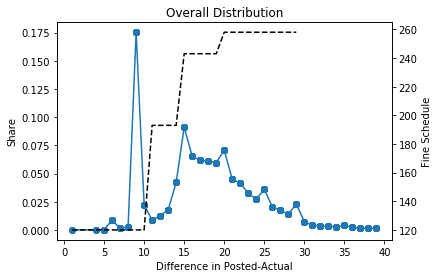

In [ ]:
full_data=merge.copy()
full_data["actual"]=full_data["actual"].replace('', np.nan)
full_data["posted"]=full_data["posted"].replace('', np.nan)
full_data["diff"]=full_data["actual"].astype("float")-full_data["posted"].astype("float")
full_data=full_data.dropna(subset=["diff"])
full_data["ones"]=1 
full_data["share"]=full_data["ones"].groupby(full_data["diff"]).transform("sum")
full_data["share"]=full_data["share"]/full_data.shape[0]
full_data.sort_values(by=['diff'], inplace=True)


full_data=full_data[full_data["diff"]<40]

fig, ax = plt.subplots(1,1)

ax.plot(full_data["diff"].astype(float), full_data["share"], '-o', label="All Stops- All Data")

ax0 = ax.twinx()
ax0.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
ax0.set_ylabel("Fine Schedule")
ax0.set_title('Overall Distribution')

ax.set_xlabel("Difference in Posted-Actual")
ax.set_ylabel("Share")



#### Graphs Showing Distribution 

In [ ]:
def dist_graphs(condition, specific=None):
    
    all_voter3=all_voter2.copy()

    dups=all_voter3[all_voter3.duplicated(['Party', condition, "race_voter", "gender_voter"])]
    dups=dups.drop_duplicates(subset=condition, keep="first", inplace=False)

    all_voter3_dedup=  all_voter3.drop_duplicates(subset=condition, keep=False)

    ## Putting Duplicates Back in if have all the same covariates 
    all_voter3_dedup=all_voter3_dedup.append(dups)

    all_voter3_dedup.drop_duplicates(subset=condition, keep=False, inplace=True)

    merge = officer_data3.merge(all_voter3_dedup[[condition,'Party', "race_voter", "gender_voter"]], on=condition, how='inner')
    
    merge=merge[pd.notna(merge.Party)]

    merge=merge.drop_duplicates(keep=False)

    merge["actual"]=merge["actual"].replace('', np.nan)
    merge["posted"]=merge["posted"].replace('', np.nan)
    merge["diff"]=merge["actual"].astype("float")-merge["posted"].astype("float")
    merged=merge.dropna(subset=["diff"])
    print("Number of Stops: ", merged.shape[0])
    print("Percent of All Stops: ", round(100*merged.shape[0]/85110,2))
    merged["ones"]=1 
    merged["share"]=merged["ones"].groupby(merged["diff"]).transform("sum")
    merged["share"]=merged["share"]/merged.shape[0]
    merged.sort_values(by=['diff'], inplace=True)

    merged=merged[merged["diff"]<40]
    
    black_driver=merged[merged["race"]=="Black"]
    black_driver["ones"]=1 
    black_driver["share"]=black_driver["ones"].groupby(black_driver["diff"]).transform("sum")
    black_driver["share"]=black_driver["share"]/black_driver.shape[0]
    black_driver.sort_values(by=['diff'], inplace=True)

    white_driver=merged[merged["race"]=="White"]
    white_driver["ones"]=1 
    white_driver["share"]=white_driver["ones"].groupby(white_driver["diff"]).transform("sum")
    white_driver["share"]=white_driver["share"]/white_driver.shape[0]
    white_driver.sort_values(by=['diff'], inplace=True)

    
    black_officer=merged[merged["race_voter"]=="3"]
    black_officer["ones"]=1 
    black_officer["share"]=black_officer["ones"].groupby(black_officer["diff"]).transform("sum")
    black_officer["share"]=black_officer["share"]/black_officer.shape[0]
    black_officer.sort_values(by=['diff'], inplace=True)

    white_officer=merged[merged["race_voter"]=="5"]
    white_officer["ones"]=1 
    white_officer["share"]=white_officer["ones"].groupby(white_officer["diff"]).transform("sum")
    white_officer["share"]=white_officer["share"]/white_officer.shape[0]
    white_officer.sort_values(by=['diff'], inplace=True)

    male_officer=merged[merged["gender_voter"]=="M"]
    male_officer["ones"]=1 
    male_officer["share"]=male_officer["ones"].groupby(male_officer["diff"]).transform("sum")
    male_officer["share"]=male_officer["share"]/male_officer.shape[0]
    male_officer.sort_values(by=['diff'], inplace=True)

    female_officer=merged[merged["gender_voter"]=="F"]
    female_officer["ones"]=1 
    female_officer["share"]=female_officer["ones"].groupby(female_officer["diff"]).transform("sum")
    female_officer["share"]=female_officer["share"]/female_officer.shape[0]
    female_officer.sort_values(by=['diff'], inplace=True)
    
    Dems=merged[merged["Party"]=="DEM"]
    Dems["ones"]=1 
    Dems["share"]=Dems["ones"].groupby(Dems["diff"]).transform("sum")
    Dems["share"]=Dems["share"]/Dems.shape[0]
    Dems.sort_values(by=['diff'], inplace=True)

    Reps=merged[merged["Party"]=="REP"]
    Reps["ones"]=1 
    Reps["share"]=Reps["ones"].groupby(Reps["diff"]).transform("sum")
    Reps["share"]=Reps["share"]/Reps.shape[0]
    Reps.sort_values(by=['diff'], inplace=True)
    if specific==None: 
        fig, ax = plt.subplots(1,5, figsize=(100,25))

        ax[0].plot(merged["diff"].astype(float), merged["share"], '-o', label="All Stops")

        ax0 = ax[0].twinx()
        ax0.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax0.set_ylabel("Fine Schedule",  fontsize=44)

        ax[1].plot(black_driver["diff"].astype(float), black_driver["share"], '-o', label="Black Driver", c="g")
        ax[1].plot(white_driver["diff"].astype(float), white_driver["share"], '-o', label="White Driver", c="y")

        ax1 = ax[1].twinx()
        ax1.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax1.set_ylabel("Fine Schedule",  fontsize=44)


        ax[2].plot(Dems["diff"].astype(float), Dems["share"], '-o', label="Democrat", c="b")
        ax[2].plot(Reps["diff"].astype(float), Reps["share"], '-o', label="Republican", c="r")

        ax2 = ax[2].twinx()
        ax2.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax2.set_ylabel("Fine Schedule",  fontsize=44)

        ax[3].plot(black_officer["diff"].astype(float), black_officer["share"], '-o', label="Black Officer", c="g")
        ax[3].plot(white_officer["diff"].astype(float), white_officer["share"], '-o', label="White Officer", c="y")

        ax3 = ax[3].twinx()
        ax3.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax3.set_ylabel("Fine Schedule",  fontsize=44)

        ax[4].plot(male_officer["diff"].astype(float), male_officer["share"], '-o', label="Male Officer", c="orange")
        ax[4].plot(female_officer["diff"].astype(float), female_officer["share"], '-o', label="Female Officer", c="b")

        ax4 = ax[4].twinx()
        ax4.plot(fine_schedule[:,0], fine_schedule[:,1], '--', c="black" )
        ax4.set_ylabel("Fine Schedule",  fontsize=44)


        ax[0].set_title('Overall Distribution', fontsize=54)
        ax[1].set_title('Black vs. White Driver Distribution', fontsize=54)
        ax[2].set_title('Republican vs. Democrat Officer', fontsize=54)
        ax[3].set_title('Black vs. White Officer', fontsize=54)
        ax[4].set_title('Male vs. Female Officer', fontsize=54)

        ax[0].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[0].set_ylabel("Share", fontsize=44)
        ax[1].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[1].set_ylabel("Share", fontsize=44)
        ax[2].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[2].set_ylabel("Share", fontsize=44)
        ax[3].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[3].set_ylabel("Share", fontsize=44)
        ax[4].set_xlabel("Difference in Posted-Actual", fontsize=44)
        ax[4].set_ylabel("Share", fontsize=44)

        ax[1].legend(loc=7, prop={'size': 40})
        ax[2].legend(loc=7, prop={'size': 40})
        ax[3].legend(loc=7, prop={'size': 40})
        ax[4].legend(loc=7, prop={'size': 40})
        
    return fig

Number of Stops:  30211
Percent of All Stops:  35.5


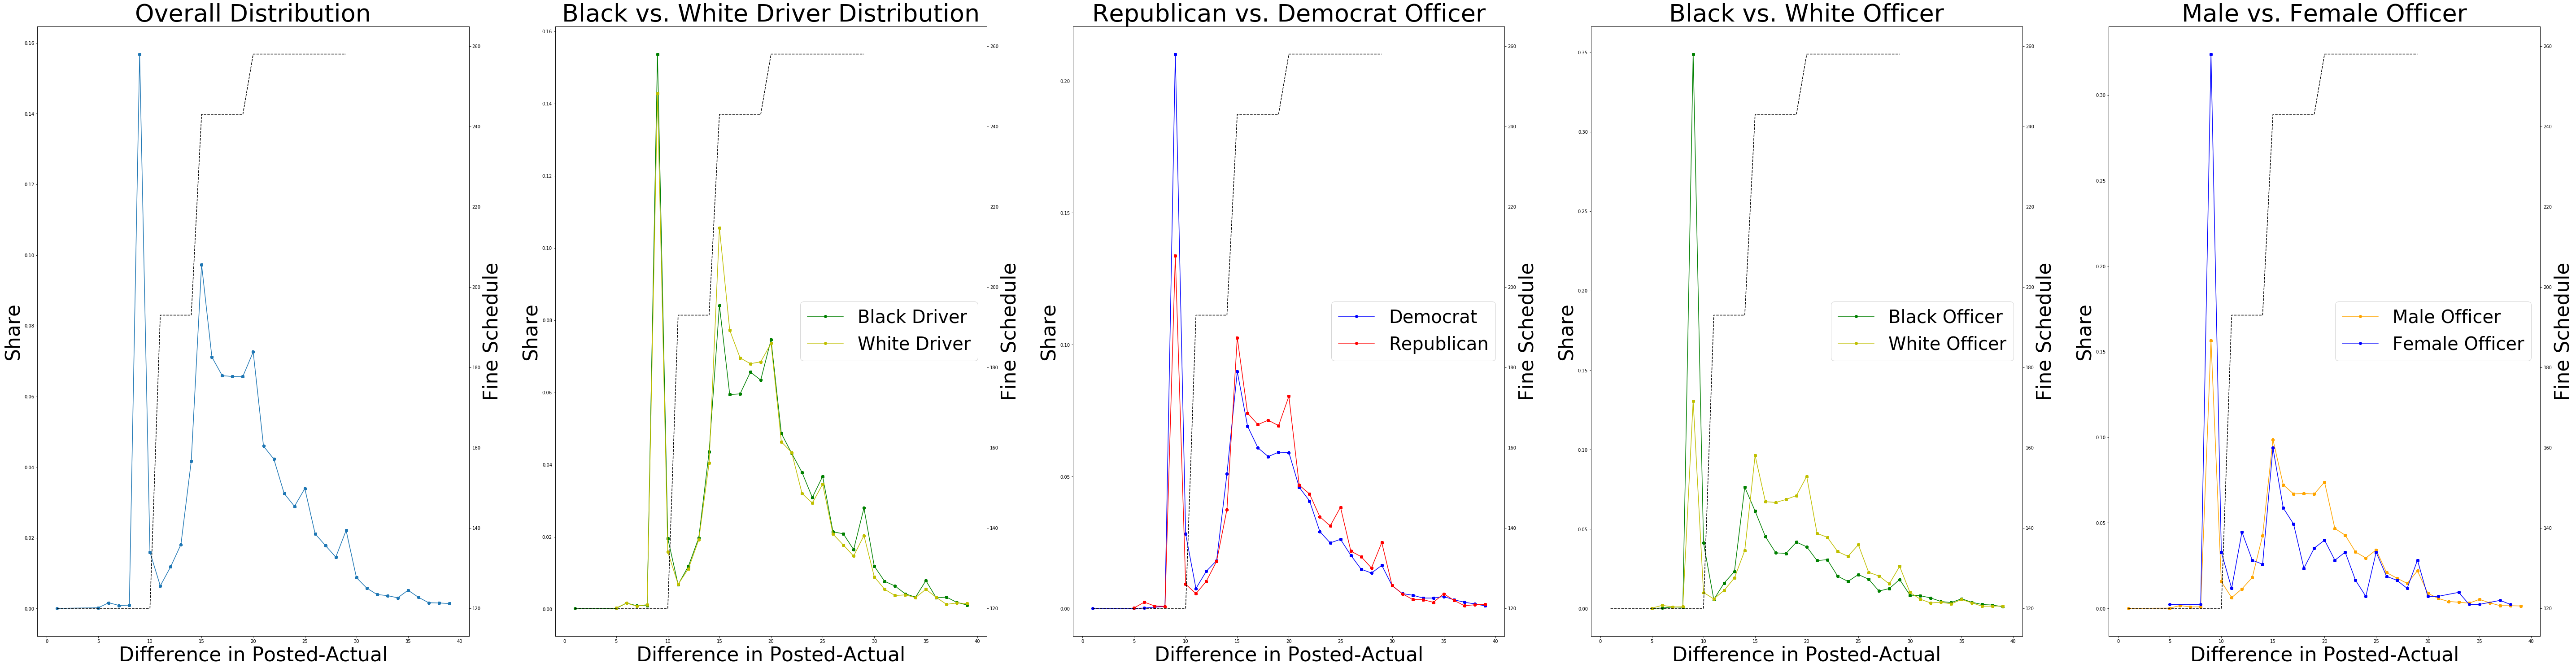

In [ ]:
first_last=dist_graphs("first_last")

Number of Stops:  15245
Percent of All Stops:  17.91


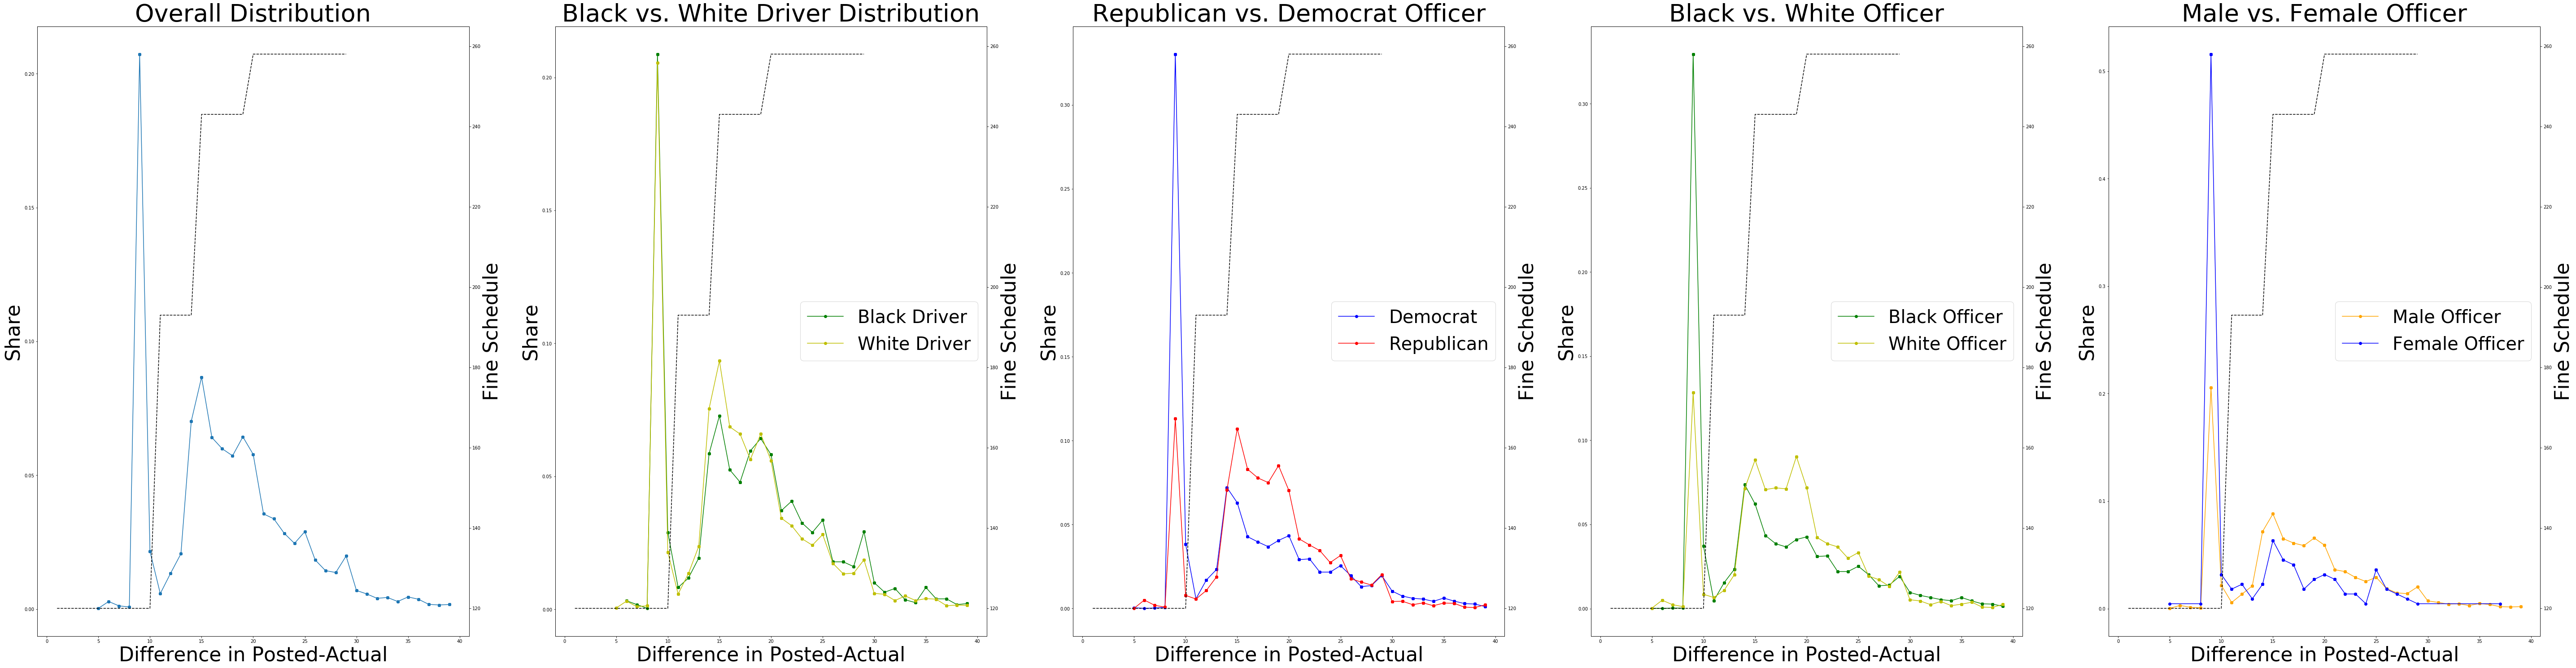

In [ ]:
first_last_middleint=dist_graphs("first_last_middleinit")

Number of Stops:  7418
Percent of All Stops:  8.72


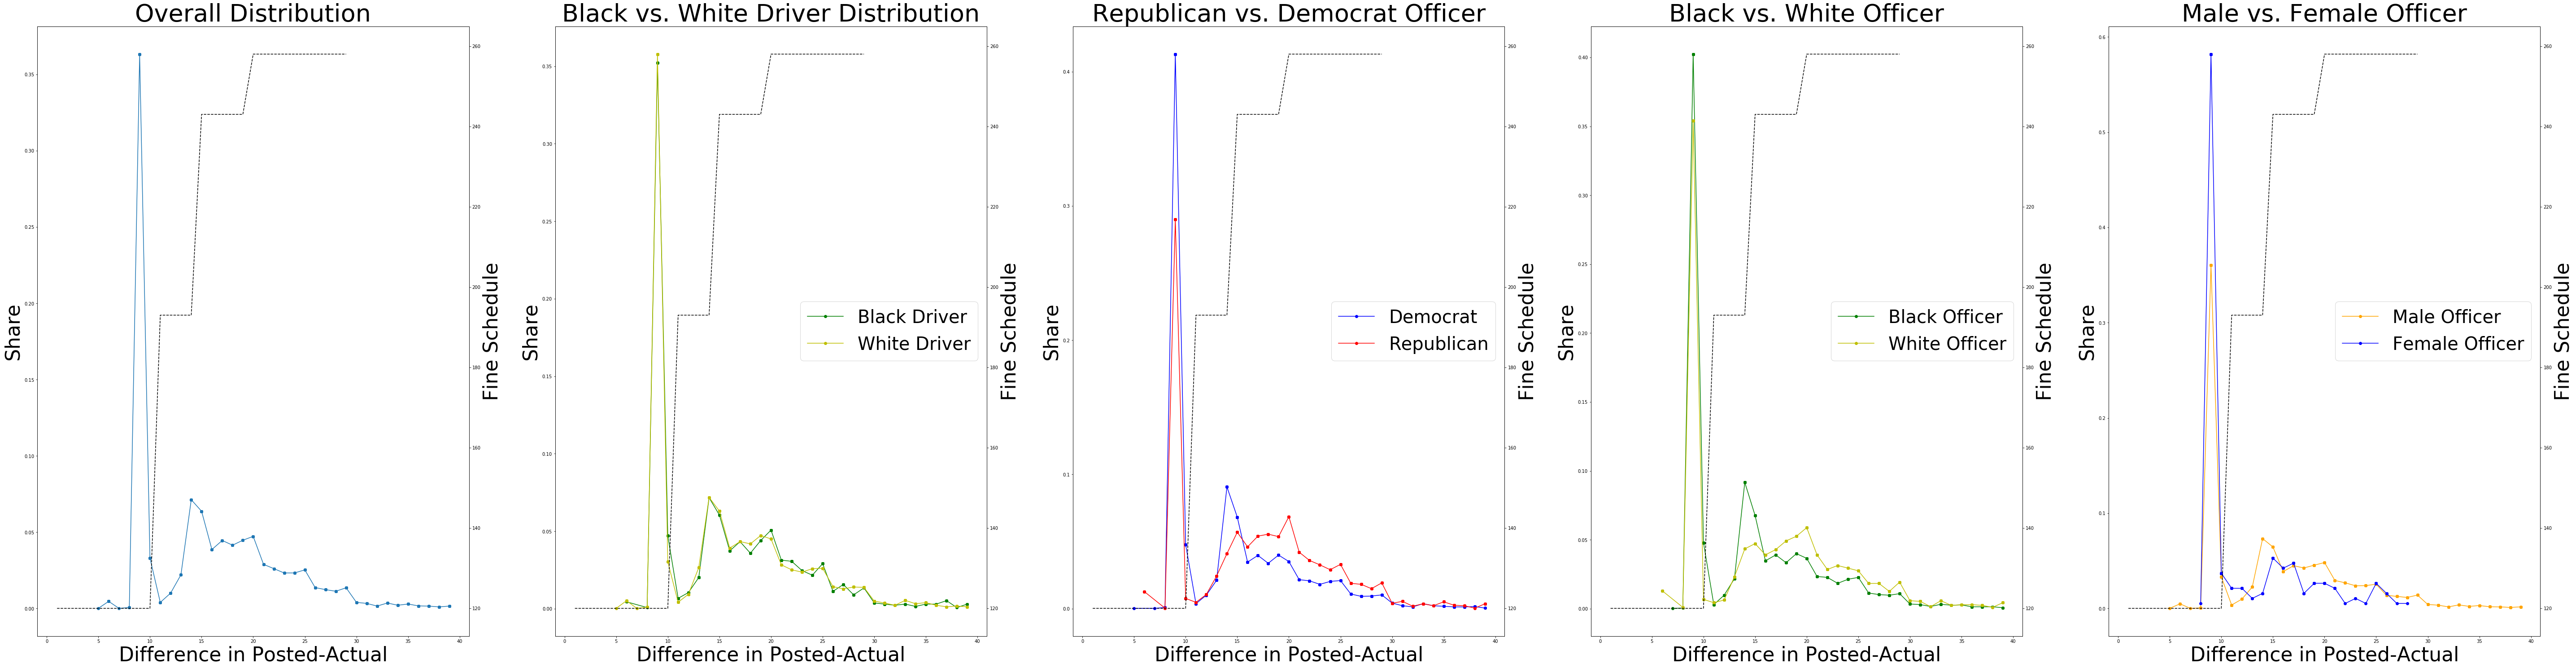

In [ ]:
first_last_middle=dist_graphs("first_last_middle")

Number of Stops:  2082
Percent of All Stops:  2.45


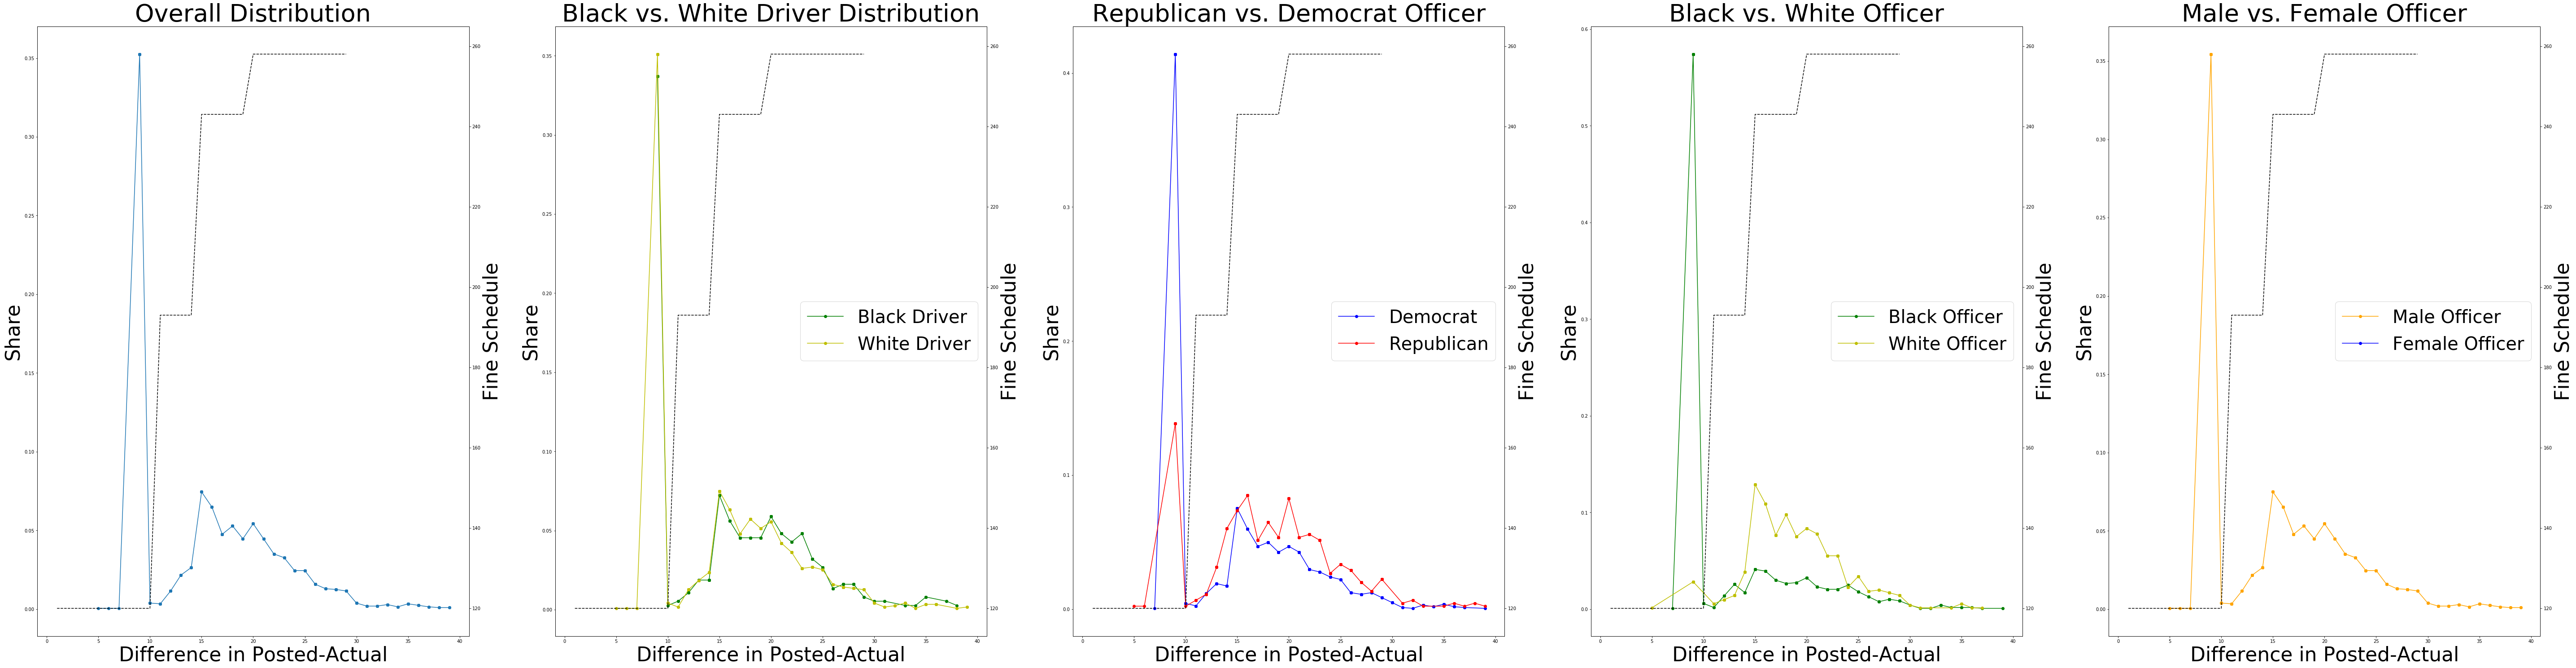

In [ ]:
first_last_suffix=dist_graphs("first_last_middleinit_suffix")

### Follow-up regarding privacy

To really assess how we could provide a suggestion to better de-identify the data, we tried to assess the level of k-anonimity in the data.

**Unique officers by agency, gender, and race**

In [ ]:
condition="first_last"
all_voter3=all_voter2.copy()

dups=all_voter3[all_voter3.duplicated(['Party', condition, "race_voter", "gender_voter"])]
dups=dups.drop_duplicates(subset=condition, keep="first", inplace=False)

all_voter3_dedup=  all_voter3.drop_duplicates(subset=condition, keep=False)

    ## Putting Duplicates Back in if have all the same covariates 
all_voter3_dedup=all_voter3_dedup.append(dups)

all_voter3_dedup.drop_duplicates(subset=condition, keep=False, inplace=True)

merge = officer_data3.merge(all_voter3_dedup[[condition,'Party', "race_voter", "gender_voter"]], on=condition, how='inner')
    
merge=merge[pd.notna(merge.Party)]

merge=merge.drop_duplicates(keep=False)

merge["actual"]=merge["actual"].replace('', np.nan)
merge["posted"]=merge["posted"].replace('', np.nan)
merge["diff"]=merge["actual"].astype("float")-merge["posted"].astype("float")
merged=merge.dropna(subset=["diff"])
print("Number of Stops: ", merged.shape[0])
print("Percent of All Stops: ", round(100*merged.shape[0]/85110,2))
merged["ones"]=1 


unique=merged.groupby(["Law Enf Agency Name", "gender_voter", "race_voter"]).size().reset_index(name='count')
unique[unique["count"]<3]

Number of Stops:  30211
Percent of All Stops:  35.5


,Law Enf Agency Name,gender_voter,race_voter,count
7,FLORIDA HIGHWAY PATROL,U,5,1
11,Hillsborough County Sheriff's Office,M,2,1
15,Hillsborough County Sheriff's Office,M,6,2
27,Tampa Police Department,M,9,1


In [ ]:
merged.gender_voter.value_counts()

M    29622
F      434
U      155
Name: gender_voter, dtype: int64

In [ ]:
merged.race_voter.value_counts()

5    18903
3     5862
4     5030
2      222
9      170
7       22
6        2
Name: race_voter, dtype: int64

In [ ]:
driver_stats=officer_data3.groupby(["race", "gender", "zipcode"]).size().reset_index(name='count')


In [ ]:
driver_stats["count"].value_counts()

1       9642
2       2961
3       1277
4        811
5        500
        ... 
2409       1
392        1
424        1
504        1
1503       1
Name: count, Length: 470, dtype: int64

In [ ]:
driver_stats=officer_data3.groupby(["race", "gender"]).size().reset_index(name='count')
driver_stats["count"].value_counts()

26622    1
45149    1
15065    1
216      1
4785     1
57264    1
54831    1
28877    1
2443     1
93513    1
3876     1
2279     1
37073    1
355      1
Name: count, dtype: int64